In [36]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [9]:
# need a function to generate training and testing data sets
def generate_data(p):
    mean = 0
    sd = 1
    # first create the training data
    np.random.seed(0)
    random_list = np.random.normal(mean, sd, (p * 100) + 100)
    training_data = [] # need to partition the random list into training data
    for i in range(100):
        temp = list(random_list[i * p:(i * p) + p])
        temp.append(random_list[(p * 100) + i]) # this is the epsilon variable
        temp.append(math.sin(temp[0] * 2) + 2 + temp[-1]) # this is the y variable
        training_data.append(temp)
        
    # next create the testing data
    np.random.seed(1)
    random_list = np.random.normal(mean, sd, (p * 10000) + 10000)
    testing_data = [] # need to partition the random list into training data
    for i in range(10000):
        temp = list(random_list[i * p:(i * p) + p])
        temp.append(random_list[(p * 10000) + i]) # this is the epsilon variable
        temp.append(math.sin(temp[0] * 2) + 2 + temp[-1]) # this is the y variable
        testing_data.append(temp)
        
    return np.array(training_data), np.array(testing_data)
        

In [47]:
def compare_fits(training_data, testing_data, p):
    '''
    takes training data and testing data and runs a multiple linear regression as well as a k-NN Regression
    and compares the error between both
    '''
    # first do the linear regression
    training_data_x = training_data[:, :p]
    training_data_y = training_data[:, [p + 1]]
    
    lm = LinearRegression()
    lm.fit(training_data_x, training_data_y)
    
    testing_data_x = testing_data[:, :p]
    y_pred = lm.predict(testing_data_x)
    testing_data_y = testing_data[: ,[p + 1]]
    mse = mean_squared_error(testing_data_y, y_pred)
    
    # next we do k-NN
    klogs = []
    knnMSE = []
    best_fit = 999999
    
    for k in range(2, 30):
        klogs.append(np.log10(1 / k))
        knnMSE.append(mean_squared_error(testing_data_y, kNN(k, testing_data_x, training_data_x, training_data_y)))
        if knnMSE[-1] < best_fit:
            best_fit = knnMSE[-1]
        
    plt.plot(klogs, knnMSE, color='black', linestyle='-', label='k-NN')
    plt.axhline(mse, c="blue", label='Linear Regression')
    plt.axhline(best_fit, c="green", linestyle="--", label="Best Fit")
    plt.title("MSE")
    plt.ylabel("MSE")
    plt.xlabel("Complexity (log(1/k))")
    plt.legend()
    plt.show()

In [38]:
def kNN(k, x, training_data_x, training_data_y):
    knn = KNeighborsRegressor(k, weights='uniform').fit(training_data_x, training_data_y).predict(x)
    return knn

p = 2


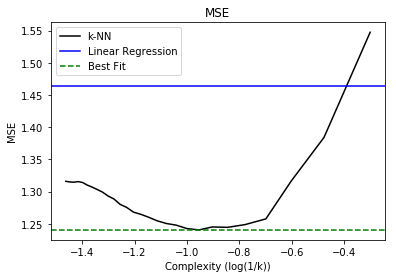

p = 3


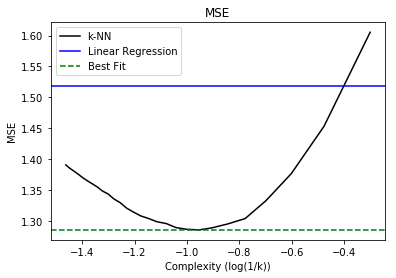

p = 4


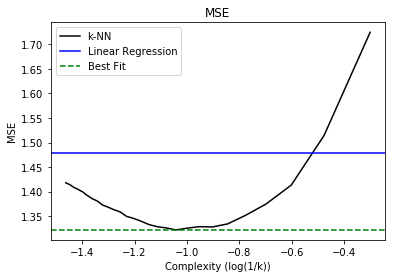

p = 5


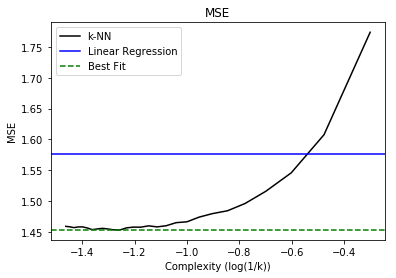

p = 6


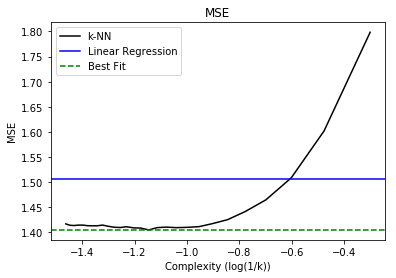

p = 7


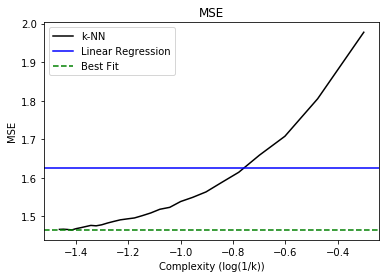

p = 8


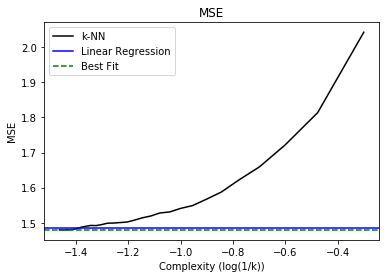

p = 9


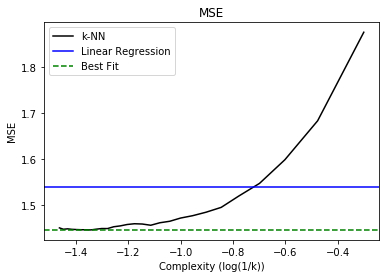

p = 10


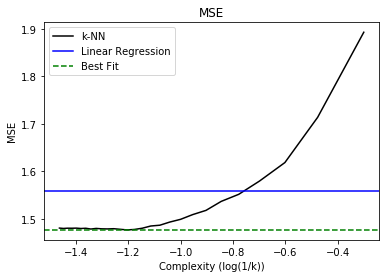

p = 11


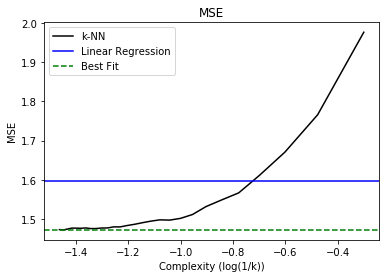

p = 12


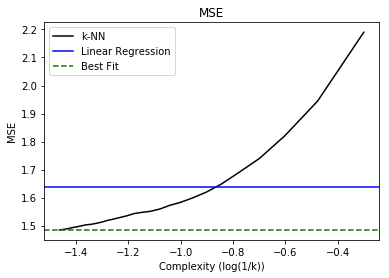

p = 13


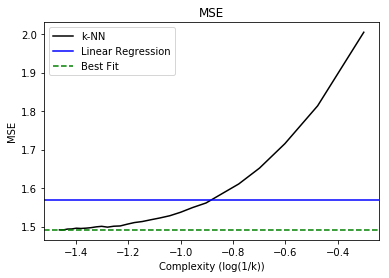

p = 14


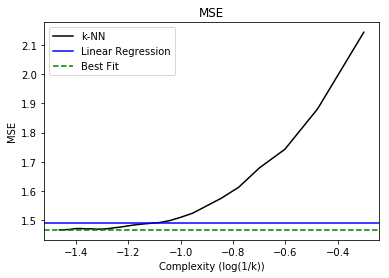

p = 15


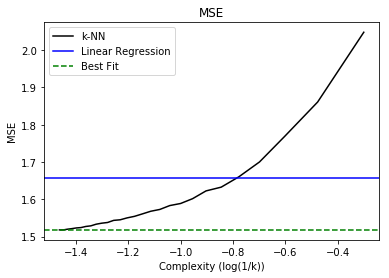

p = 16


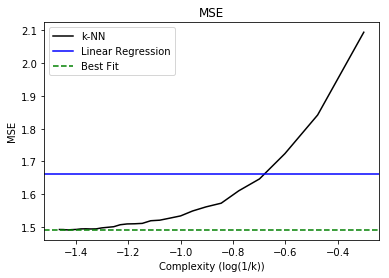

p = 17


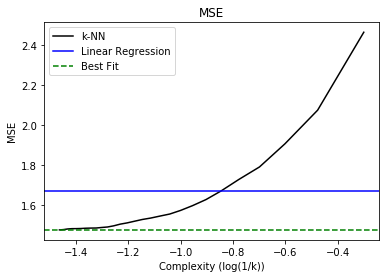

p = 18


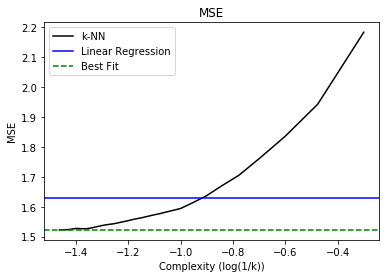

p = 19


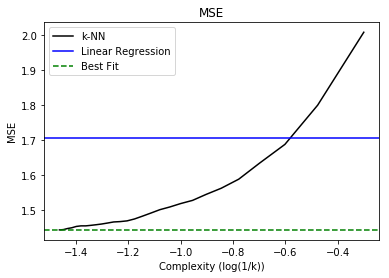

p = 20


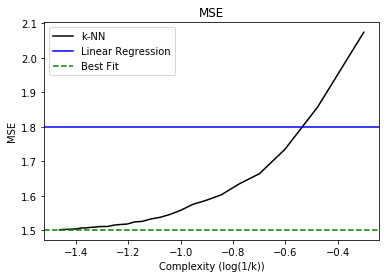

In [49]:
for i in range(2, 21):
    print("p = %i" % i)
    training_data, testing_data = generate_data(i)
    compare_fits(training_data, testing_data, i)